# Task 2

In task number two we will be examining the performance in trial vs control stores to provide a recommentdation for each location based on our insight. Here are some of the areas we will be focusing on:

- Select control stores: explore the data and define metrics for the control store selection - what would make them control stores? - Visualize the drivers to determine suitability
- Assesment of the trial: get insights on each of the stores. Compare each trial store with control store to get its overall performance. We want to know if the trial stores were successful or not
- Collate findings: summarize findings for each store and provide recommendations to share with client outlining the impact on sales during the trial period.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
qvi_data= pd.read_csv('../data/QVI_data.csv')
qvi_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
qvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


The client has selected store number 77, 86 and 88 as the trial stores and wants control stores to be established stores that are operational for the entire observation period (Feb 1 2019 - Apr 30 2019).

Our goal is to match trial stores to control stores that are similar to the trial stores prior to the trial of Feb 2019 in terms of:
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

Let's compile each store's monthly metrics of interest and filter to stores that are present throughout the pre-trial period:
- Total sales
- Number of customers
- Average transactions per customer
- Average chips per customer
- Average price per unit

In [5]:
qvi_data["DATE"] = pd.to_datetime(qvi_data["DATE"])
qvi_data["YEARMONTH"] = qvi_data["DATE"].dt.strftime("%Y%m").astype("int")

In [7]:
def monthly_store_metrics():
    """Returns the monthly store metrics for each store"""
    store_yrmo_group = qvi_data.groupby(["STORE_NBR", "YEARMONTH"])
    total = store_yrmo_group["TOT_SALES"].sum()
    num_customers = store_yrmo_group["LYLTY_CARD_NBR"].nunique()
    trans_per_cust = store_yrmo_group.size() / num_customers
    avg_chips_per_cust = store_yrmo_group["PROD_QTY"].sum() / num_customers
    avg_price_per_unit = total / store_yrmo_group["PROD_QTY"].sum()
    aggregates = [total, num_customers, trans_per_cust, avg_chips_per_cust, avg_price_per_unit]
    metrics = pd.concat(aggregates, axis=1)
    metrics.columns = ["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"]
    return metrics

In [8]:
qvi_monthly_metrics = monthly_store_metrics().reset_index()
qvi_monthly_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3169 non-null   int64  
 1   YEARMONTH        3169 non-null   int64  
 2   TOT_SALES        3169 non-null   float64
 3   nCustomers       3169 non-null   int64  
 4   nTxnPerCust      3169 non-null   float64
 5   nChipsPerTxn     3169 non-null   float64
 6   avgPricePerUnit  3169 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 173.4 KB


In [11]:
# filter for pre trial period and for stores with a full 12 month observation period
observ_counts = qvi_monthly_metrics["STORE_NBR"].value_counts()
full_observ_stores = observ_counts[observ_counts == 12].index
full_observ = qvi_monthly_metrics[qvi_monthly_metrics["STORE_NBR"].isin(full_observ_stores)]
pretrial = full_observ[full_observ["YEARMONTH"] < 201902]
pretrial.head(10)

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
5,1,201812,189.6,42,1.119048,1.357143,3.326316
6,1,201901,154.8,35,1.028571,1.200000,3.685714
12,2,201807,150.8,39,1.051282,1.179487,3.278261
13,2,201808,193.8,39,1.102564,1.410256,3.523636
14,2,201809,154.4,36,1.027778,1.138889,3.765854


Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store. A function is probably best here so we don't have to calculate the correlation for each trial store and control store pair.

In [16]:
# create a function to calculate the correlation between trial store and other stores
def calc_corr_table(metricCol, storeComparison, inputTable=pretrial):
    """
    Calculates the correlation between trial store and other stores
    
    Args:
        metricCol (str): the column name of the store's metric to perform correlation on
        storeComparison (int): the store number of the trial store
        inputTable (DataFrame): table with potential comparison stores

    Returns:
        DataFrame: monthly correlation table between trial store and control stores
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    corrs = pd.DataFrame(columns=["YEARMONTH", "TRIAL_STR", "CTRL_STR", "CORR_SCORE"])
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    for control in control_store_nbrs:
        concat_df = pd.DataFrame(columns=["YEARMONTH", "TRIAL_STR", "CTRL_STR", "CORR_SCORE"])
        control_store = inputTable[inputTable["STORE_NBR"] == control][metricCol].reset_index()
        concat_df["CORR_SCORE"] = trial_store.corrwith(control_store, axis=1)
        concat_df["TRIAL_STR"] = storeComparison
        concat_df["CTRL_STR"] = control
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
        corrs = pd.concat([corrs, concat_df])
    return corrs

In [17]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calc_corr_table(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
corr_table.head(10)

,YEARMONTH,TRIAL_STR,CTRL_STR,CORR_SCORE
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024
5,201812,77,1,0.063946
6,201901,77,1,0.001470
0,201807,77,2,0.142957
1,201808,77,2,0.097595
2,201809,77,2,0.077981


Apart from correlation, we can also calculate a standardized metric based on the absolute difference between the trial store's performance and each control store's performance.

In [18]:
# calculate the standardized magnitude distance between trial store and control store

def calc_magn_distnace(metricCol, storeComparison, inputTable=pretrial):
    """
    Calculate the standardized magnitude distance between trial store and control store

    Args:
        metricCol (str): the column name of the store's metric to perform distance calculation on
        storeComparison (int): the store number of the trial store
        inputTable (DataFrame): table with potential comparison stores

    Returns:
        DataFrame: monthly standardized magnitude distance between trial store and control stores
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    dists = pd.DataFrame()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol]
    for control in control_store_nbrs:
        concat_df = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == control].reset_index()[metricCol])
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
        concat_df["TRIAL_STR"] = storeComparison
        concat_df["CTRL_STR"] = control
        dists = pd.concat([dists, concat_df])
    for col in metricCol:
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists["magnitude"] = dists[metricCol].mean(axis=1)
    return dists
        

In [19]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calc_magn_distnace(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
dist_table.head(10)

,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,YEARMONTH,TRIAL_STR,CTRL_STR,magnitude
0,0.935431,0.980769,0.958035,0.739412,0.883569,201807,77,1,0.899443
1,0.942972,0.951923,0.993823,0.802894,0.886328,201808,77,1,0.915588
2,0.961503,0.836538,0.992126,0.730041,0.703027,201809,77,1,0.844647
3,0.988221,0.932692,0.989514,0.940460,0.590528,201810,77,1,0.888283
4,0.962149,0.951923,0.874566,0.730358,0.832481,201811,77,1,0.870296
5,0.944193,0.961538,0.868716,0.857966,0.770744,201812,77,1,0.880632
6,0.964375,1.000000,0.790956,0.551428,0.678728,201901,77,1,0.797098
0,0.895138,0.884615,0.933787,0.680831,0.848622,201807,77,2,0.848599
1,0.955685,0.923077,0.801752,0.887907,0.957997,201808,77,2,0.905284
2,0.949149,0.942308,0.951610,0.639734,0.674207,201809,77,2,0.831401


In [20]:
dist_table.shape

(5397, 9)

We'll select control store based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores by using correlation and magnitude distance. We'll need to use our functions to get four scores, two for each of total sales and total customers.

In [21]:
def combine_corr_dist(metricCol, storeComparison, inputTable=pretrial):
    corrs = calc_corr_table(metricCol, storeComparison, inputTable)
    dists = calc_magn_distnace(metricCol, storeComparison, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["YEARMONTH", "TRIAL_STR", "CTRL_STR"])
    return combine

In [22]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dist(["TOT_SALES"], trial_num)])

In [23]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [25]:
# top 5 highest composite score for each trial store based on TOT_SALES
grouped_comparison_table1 = compare_metrics_table1.groupby(["TRIAL_STR", "CTRL_STR"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["CORR_SCORE"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["TRIAL_STR"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["TRIAL_STR"] == trial_num].sort_values(by="CompScore", ascending=False).head(5))

     TRIAL_STR  CTRL_STR      YEARMONTH  CORR_SCORE  magnitude  CompScore
218         77       233  201822.571429         1.0   0.986477   0.993238
239         77       255  201822.571429         1.0   0.979479   0.989739
177         77       188  201822.571429         1.0   0.977663   0.988831
49          77        53  201822.571429         1.0   0.976678   0.988339
120         77       131  201822.571429         1.0   0.976267   0.988134
     TRIAL_STR  CTRL_STR      YEARMONTH  CORR_SCORE  magnitude  CompScore
356         86       109  201822.571429         1.0   0.966783   0.983391
401         86       155  201822.571429         1.0   0.965876   0.982938
464         86       222  201822.571429         1.0   0.962280   0.981140
467         86       225  201822.571429         1.0   0.960512   0.980256
471         86       229  201822.571429         1.0   0.951704   0.975852
     TRIAL_STR  CTRL_STR      YEARMONTH  CORR_SCORE  magnitude  CompScore
551         88        40  201822.57142

In [26]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77, 86, 88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2, combine_corr_dist(["nCustomers"], trial_num)])

In [27]:
# top 5 highest composite score for each trial store based on nCustomers
grouped_comparison_table2 = compare_metrics_table2.groupby(["TRIAL_STR", "CTRL_STR"]).mean().reset_index()
grouped_comparison_table2["CompScore"] = (corr_weight * grouped_comparison_table2["CORR_SCORE"]) + (dist_weight * grouped_comparison_table2["magnitude"])
for trial_num in compare_metrics_table2["TRIAL_STR"].unique():
    print(grouped_comparison_table2[grouped_comparison_table2["TRIAL_STR"] == trial_num].sort_values(by="CompScore", ascending=False).head(5))

     TRIAL_STR  CTRL_STR      YEARMONTH  CORR_SCORE  magnitude  CompScore
218         77       233  201822.571429         1.0   0.993132   0.996566
38          77        41  201822.571429         1.0   0.976648   0.988324
101         77       111  201822.571429         1.0   0.968407   0.984203
105         77       115  201822.571429         1.0   0.967033   0.983516
15          77        17  201822.571429         1.0   0.965659   0.982830
     TRIAL_STR  CTRL_STR      YEARMONTH  CORR_SCORE  magnitude  CompScore
401         86       155  201822.571429         1.0   0.986772   0.993386
467         86       225  201822.571429         1.0   0.969577   0.984788
356         86       109  201822.571429         1.0   0.969577   0.984788
471         86       229  201822.571429         1.0   0.964286   0.982143
293         86        39  201822.571429         1.0   0.961640   0.980820
     TRIAL_STR  CTRL_STR      YEARMONTH  CORR_SCORE  magnitude  CompScore
736         88       237  201822.57142

In [30]:
for trial_num in compare_metrics_table2["TRIAL_STR"].unique():
    a = grouped_comparison_table1[grouped_comparison_table1["TRIAL_STR"] == trial_num].sort_values(by="CompScore", ascending=False).set_index(["TRIAL_STR", "CTRL_STR"])["CompScore"]
    b = grouped_comparison_table2[grouped_comparison_table2["TRIAL_STR"] == trial_num].sort_values(by="CompScore", ascending=False).set_index(["TRIAL_STR", "CTRL_STR"])["CompScore"]
    print((pd.concat([a, b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3), '\n')
    

TRIAL_STR  CTRL_STR
77         233         0.994902
           41          0.986020
           46          0.984762
dtype: float64 

TRIAL_STR  CTRL_STR
86         155         0.988162
           109         0.984090
           225         0.982522
dtype: float64 

TRIAL_STR  CTRL_STR
88         40          0.970895
           26          0.958929
           72          0.954079
dtype: float64 



Based on our analysis we can break down the trial and control store comparisons as such:

- Top 3 similarity based on total sales
    - Trial store 77: Store 233, 255 & 188
    - Trial store 86: Store 109, 155 & 122
    - Trial store 88: Store 40, 26 & 72

- Top 3 similarity based on number of customers
    - Trial store 77: Store 233, 41 & 111
    - Trial store 86: Store 155, 225 & 109
    - Trial store 88: Store 237, 203 & 40 

- Based on highest average of both features combined
    - Trial store 77: Store 233
    - Trial store 86: Store 155
    - Trial store 88: Store 40

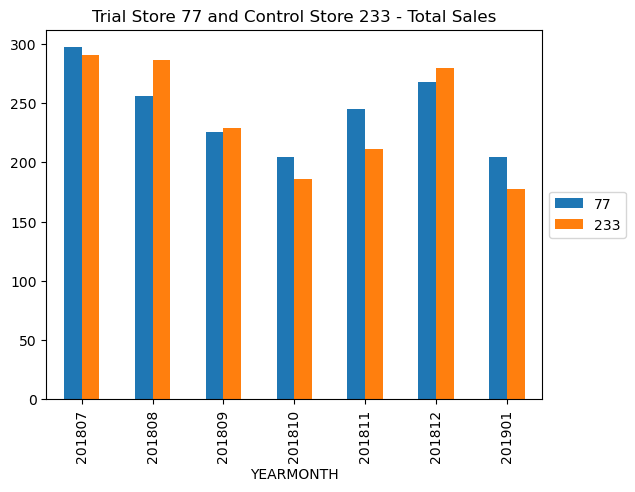

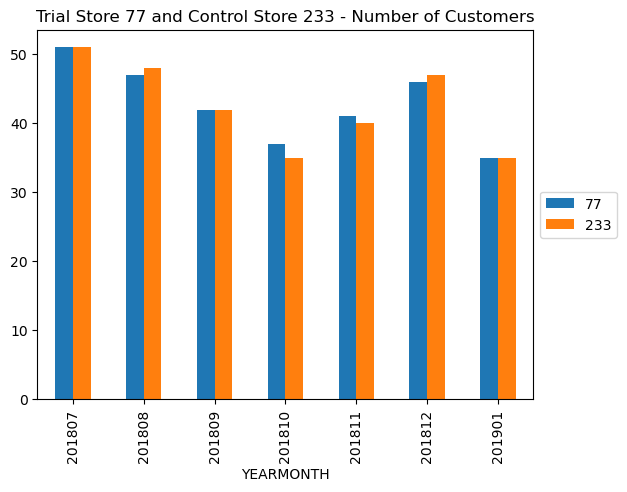

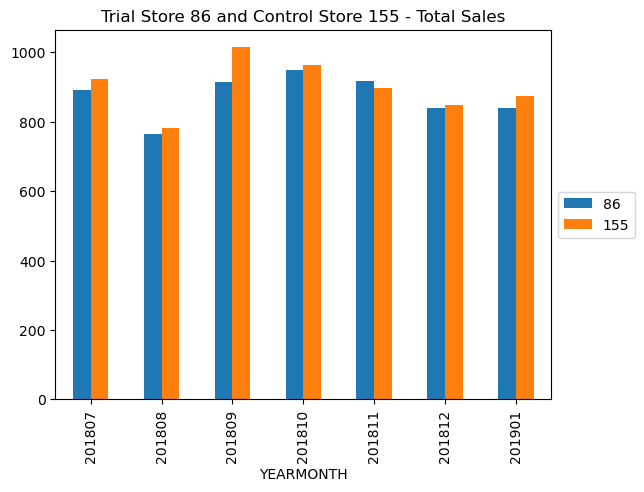

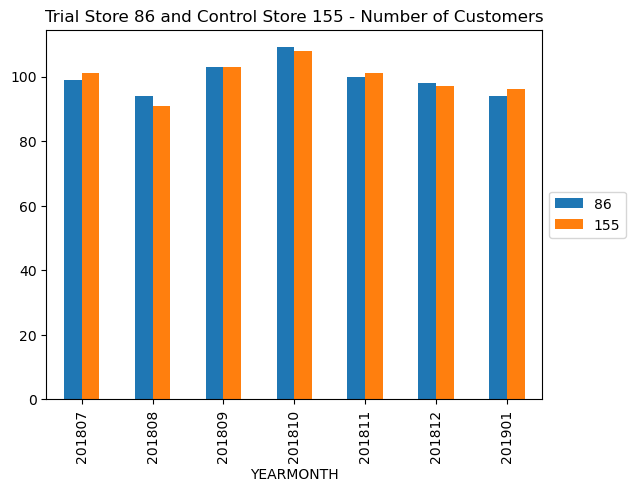

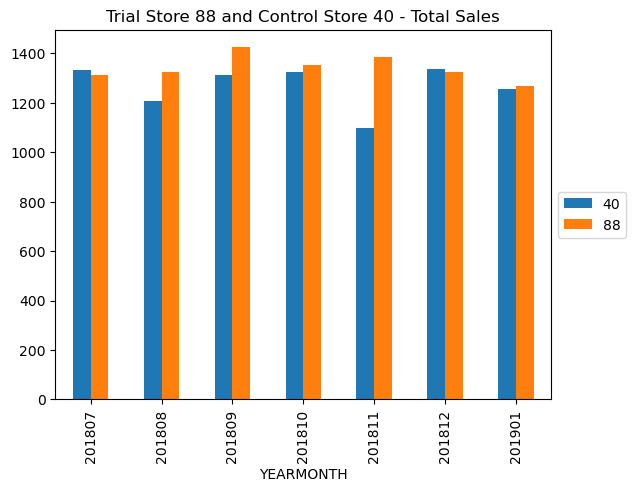

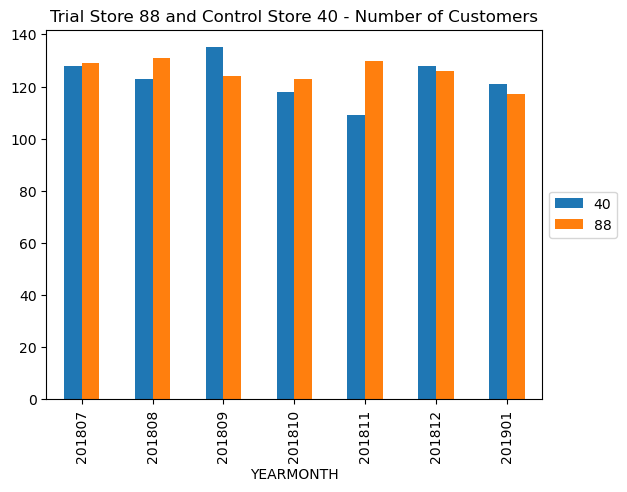

In [31]:
# visualizing the trial and control store comparisons over time

trial_control_dict = {77: 233, 86: 155, 88: 40}

for key, val in trial_control_dict.items():
    pretrial[pretrial["STORE_NBR"].isin([key, val])].groupby(["YEARMONTH", "STORE_NBR"])["TOT_SALES"].sum().unstack().plot.bar()
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store " + str(key) + " and Control Store " + str(val) + " - Total Sales")
    plt.show()
    pretrial[pretrial["STORE_NBR"].isin([key, val])].groupby(["YEARMONTH", "STORE_NBR"])["nCustomers"].sum().unstack().plot.bar()
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store " + str(key) + " and Control Store " + str(val) + " - Number of Customers")
    plt.show()
    print("\n")

Next we'll compare the performance of trial stores and control stores during the trial period. To ensure their performance is comparable during the trial period, we need to scale (multiply the ratio of trial / control) all of the control stores performance to the trial store's performance during pre-trial period. Starting with total sales.

In [32]:
# Ratio of store 77 and its comparable control store
sales_ratio_77 = pretrial[pretrial["STORE_NBR"] == 77]["TOT_SALES"].sum() / pretrial[pretrial["STORE_NBR"] == 233]["TOT_SALES"].sum()

# Ratio of Store 86 and its comparable control store
sales_ratio_86 = pretrial[pretrial["STORE_NBR"] == 86]["TOT_SALES"].sum() / pretrial[pretrial["STORE_NBR"] == 155]["TOT_SALES"].sum()

#Ratio of Store 88 aand its comparable control store
sales_ratio_88 = pretrial[pretrial["STORE_NBR"] == 88]["TOT_SALES"].sum() / pretrial[pretrial["STORE_NBR"] == 40]["TOT_SALES"].sum()

In [33]:
full_trial_period = full_observ[(full_observ["YEARMONTH"] >= 201902) & (full_observ["YEARMONTH"] <= 201904)]
scaled_sales_control_stores = full_observ[full_observ["STORE_NBR"].isin([233, 155, 40])][["STORE_NBR", "YEARMONTH", "TOT_SALES"]]

def scaler(row):
    if row["STORE_NBR"] == 233:
        return row["TOT_SALES"] * sales_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["TOT_SALES"] * sales_ratio_86
    else:
        return row["TOT_SALES"] * sales_ratio_88
    
scaled_sales_control_stores["ScaledSales"] = scaled_sales_control_stores.apply(lambda row: scaler(row), axis=1)

trial_scaled_sales_control_stores = scaled_sales_control_stores[(scaled_sales_control_stores["YEARMONTH"] >= 201902) & (scaled_sales_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_sales_control_stores = scaled_sales_control_stores[scaled_sales_control_stores["YEARMONTH"] < 201902]

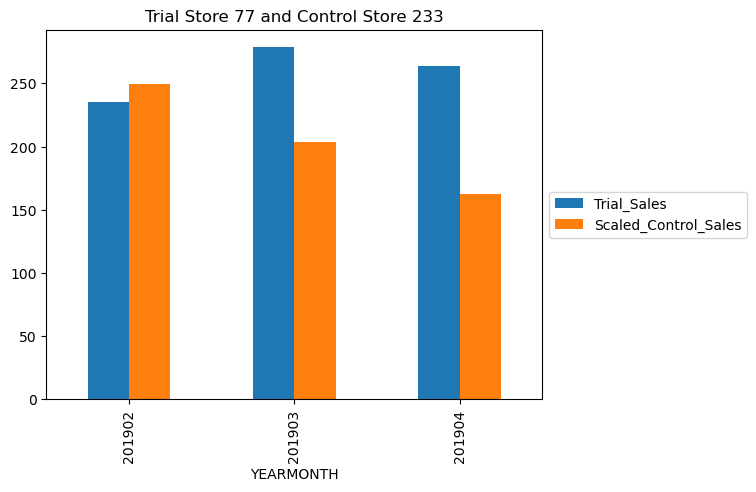

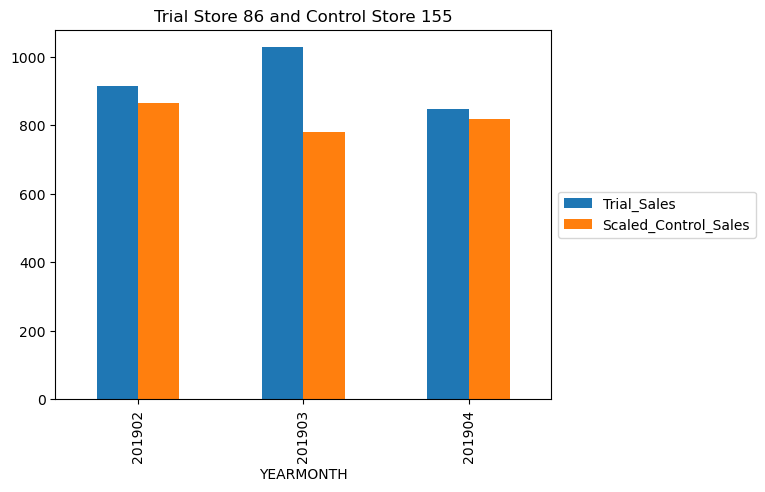

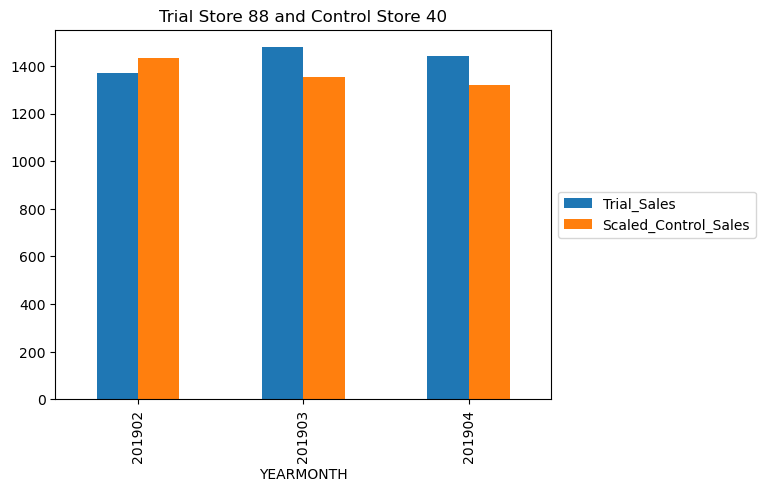

In [34]:
percentage_diff = {}

for trial, control in trial_control_dict.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]
    b = full_trial_period[full_trial_period["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TOT_SALES"]]
    percentage_diff[trial] = b["TOT_SALES"].sum() / a["ScaledSales"].sum()
    b[["YEARMONTH", "TOT_SALES"]].merge(a[["YEARMONTH", "ScaledSales"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_Sales", "TOT_SALES":"Trial_Sales"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [35]:
percentage_diff

{77: 1.2615468650086281, 86: 1.1315014357363697, 88: 1.043458345854219}

In [36]:
# creating a compiled percentage_difference table
temp1 = scaled_sales_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index().drop(["TOT_SALES", "index"], axis=1)
temp2 = full_observ[full_observ["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "TOT_SALES"]].reset_index().drop(["index", "YEARMONTH"], axis=1)
scaledsales_vs_trial = pd.concat([temp1, temp2], axis=1)
scaledsales_vs_trial.columns = ["c_STORE_NBR", "YEARMONTH", "c_ScaledSales", "t_STORE_NBR", "t_TOT_SALES"]
scaledsales_vs_trial["Sales_Percentage_Diff"] = (scaledsales_vs_trial["t_TOT_SALES"] - scaledsales_vs_trial["c_ScaledSales"]) / (((scaledsales_vs_trial["t_TOT_SALES"] + scaledsales_vs_trial["c_ScaledSales"])/2))
def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"
scaledsales_vs_trial["trial_period"] = scaledsales_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEARMONTH,c_ScaledSales,t_STORE_NBR,t_TOT_SALES,Sales_Percentage_Diff,trial_period
7,233,201902,249.762622,77,235.0,-0.060907,trial
8,233,201903,203.802205,77,278.5,0.309755,trial
9,233,201904,162.345704,77,263.5,0.475075,trial
19,155,201902,864.522060,86,913.2,0.054764,trial
20,155,201903,780.320405,86,1026.8,0.272787,trial
21,155,201904,819.317024,86,848.2,0.034642,trial
31,40,201902,1434.399269,88,1370.2,-0.045781,trial
32,40,201903,1352.064709,88,1477.2,0.088458,trial
33,40,201904,1321.797762,88,1439.4,0.085182,trial


Now we should check to see if the difference is significant. What we're specifically checking for is the significance of the trial store total sales percentage difference in the pre-trial period vs the trial period.

Here is the process broken down:

- Step 1:
    - check the null hypothesis of 0 difference between control store's pre-trial and trial period performance
- Step 2:
    - proof that control and trial stores are statistically significant
        - check the p-value of control store's pre-trial vs trial store's pre-trial
        - if the value <5%, it's significantly different. If it's >5%, it's not significantly different (similar)
- Step 3:
    - after checking if the null hypothesis from the first two steps is true, we can check the null hypothesis of percentage difference between trial and control stores during pre-trial period is the same as during the trial period
        - check t-value of percentage difference of each trial month (Feb., March, April 2019)
        - check that the mean is the mean of percentage difference during pre-trial
        - standard deviation is the standard deviation of percentage difference during pre-trial
        - the formula we'll use is trial month's percentage difference minus the mean, divided by standard deviation
        - compare the t-value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [37]:
from scipy.stats import ttest_ind, t

# Step 1
for num in [40, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   equal_var=False), '\n')
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num])])-1))

Store 40
Ttest_indResult(statistic=-0.5958372343168558, pvalue=0.5722861621434027) 

Store 155
Ttest_indResult(statistic=1.4291956879290917, pvalue=0.1972705865160342) 

Store 233
Ttest_indResult(statistic=1.191102601097452, pvalue=0.2944500606486209) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [38]:
a = pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == 40]["ScaledSales"]
b = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == 40]["ScaledSales"]

It turns out that the null hypothesis is true, there isn't any statistical significant difference between control store's scaled pre-trial period sales.

In [39]:
# Step 2
for trial, cont in trial_control_dict.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pretrial[pretrial["STORE_NBR"] == trial]["TOT_SALES"],
                   pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"],
                   equal_var=True), '\n')

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pretrial[pretrial["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=-1.2533353315065932e-15, pvalue=0.999999999999999) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=3.1048311203382156e-15, pvalue=0.9999999999999976) 

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=-5.69358613974361e-15, pvalue=0.9999999999999956) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


The null hypothesis is true again. There isn't any statistical significant difference between the trial store's sales and control store's scaled sales during the pre-trial period.

In [40]:
# Step 3
for trial, cont in trial_control_dict.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == cont) & (scaledsales_vs_trial["trial_period"]=="pre")]
    std = temp_pre["Sales_Percentage_Diff"].std()
    mean = temp_pre["Sales_Percentage_Diff"].mean()
    #print(std, mean)
    for t_month in scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]["YEARMONTH"].unique():
        pdif = scaledsales_vs_trial[(scaledsales_vs_trial["YEARMONTH"] == t_month) & (scaledsales_vs_trial["t_STORE_NBR"] == trial)]["Sales_Percentage_Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.7171038288055838
201903 : 3.035317928855674
201904 : 4.708944418758219


Trial store: 86 , Control store: 155
201902 : 1.4133618775921597
201903 : 7.123063846042147
201904 : 0.8863824572944234


Trial store: 88 , Control store: 40
201902 : -0.5481633746817577
201903 : 1.0089992743637823
201904 : 0.9710006270463672


Critical t-value for 95% confidence interval:
1.9431802803927816


/var/folders/xs/d1td623j4l5_3s9p262jr4yw0000gn/T/ipykernel_38328/233696007.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(t_month,":",(float(pdif)-mean)/std)


There are 3 months of increase in performance that are statistically significant (Above the 95% confidence interval t-score):

- March and April trial months for trial store 77
- March trial months for trial store 86

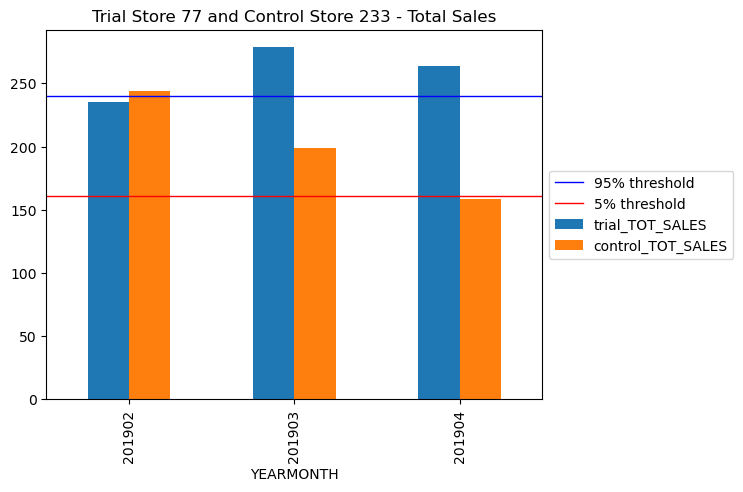

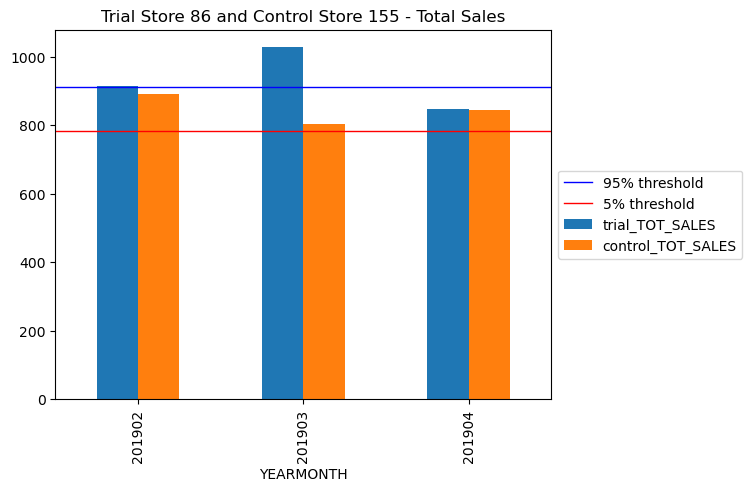

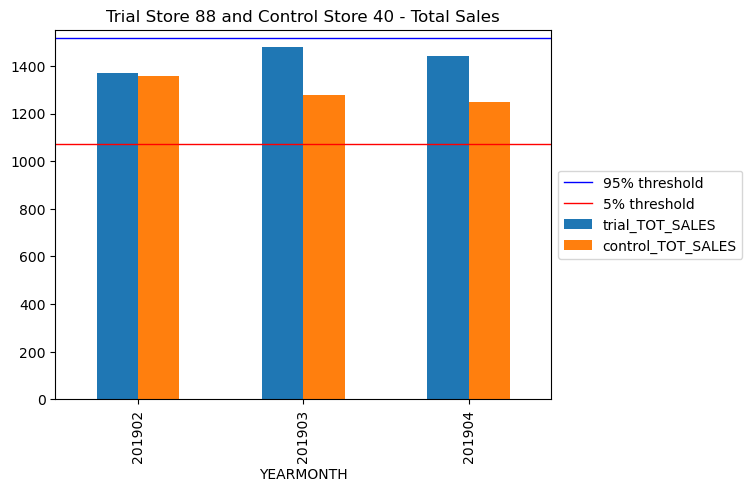

In [41]:
for trial, control in trial_control_dict.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control].rename(columns={"TOT_SALES": "control_TOT_SALES"})
    b = full_trial_period[full_trial_period["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TOT_SALES"]].rename(columns={"TOT_SALES": "trial_TOT_SALES"})
    comb = b[["YEARMONTH", "trial_TOT_SALES"]].merge(a[["YEARMONTH", "control_TOT_SALES"]],on="YEARMONTH").set_index("YEARMONTH")
    comb.plot.bar()
    cont_sc_sales = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]["TOT_SALES"]
    std = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == control) & (scaledsales_vs_trial["trial_period"]=="pre")]["Sales_Percentage_Diff"].std()
    thresh95 = cont_sc_sales.mean() + (cont_sc_sales.mean() * std * 2)
    thresh5 = cont_sc_sales.mean() - (cont_sc_sales.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Total Sales")
    plt.savefig("TS {} and CS {} - TOT_SALES.png".format(trial,control), bbox_inches="tight")

We can see that the trial store number 77's sales for March and April exceeds the 95% threshold of control store. The same goes to store 86's sales for March.

Next, we'll look into number of customers.

In [42]:
# Ratio of Store 77 and its comparable control store
ncust_ratio_77 = pretrial[pretrial["STORE_NBR"] == 77]["nCustomers"].sum() / pretrial[pretrial["STORE_NBR"] == 233]["nCustomers"].sum()

# Ratio of Store 86 and its comparable control store
ncust_ratio_86 = pretrial[pretrial["STORE_NBR"] == 86]["nCustomers"].sum() / pretrial[pretrial["STORE_NBR"] == 155]["nCustomers"].sum()

# Ratio of Store 88 and its comparable control store
ncust_ratio_88 = pretrial[pretrial["STORE_NBR"] == 88]["nCustomers"].sum() / pretrial[pretrial["STORE_NBR"] == 40]["nCustomers"].sum()

In [43]:
scaled_ncust_control_stores = full_observ[full_observ["STORE_NBR"].isin([233, 155, 40])][["STORE_NBR", "YEARMONTH", "nCustomers"]]

def scaler_c(row):
    if row["STORE_NBR"] == 233:
        return row["nCustomers"] * ncust_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["nCustomers"] * ncust_ratio_86
    elif row["STORE_NBR"] == 40:
        return row["nCustomers"] * ncust_ratio_88

scaled_ncust_control_stores["ScaledNcust"] = scaled_ncust_control_stores.apply(lambda row: scaler_c(row), axis=1)

trial_scaled_ncust_control_stores = scaled_ncust_control_stores[(scaled_ncust_control_stores["YEARMONTH"] >= 201902) & (scaled_ncust_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_ncust_control_stores = scaled_ncust_control_stores[scaled_ncust_control_stores["YEARMONTH"] < 201902]

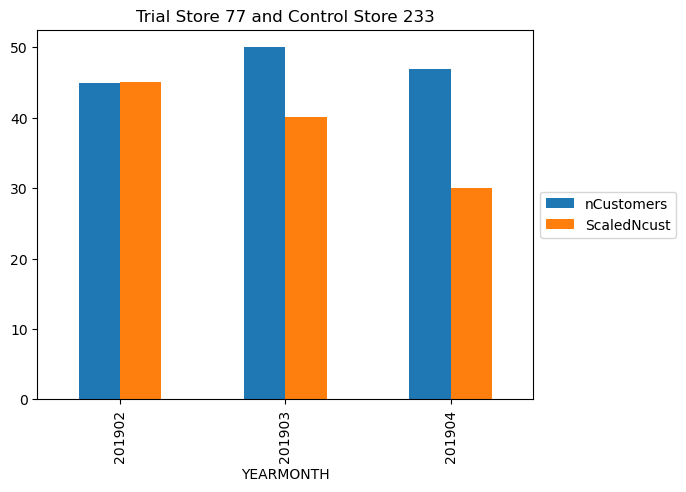

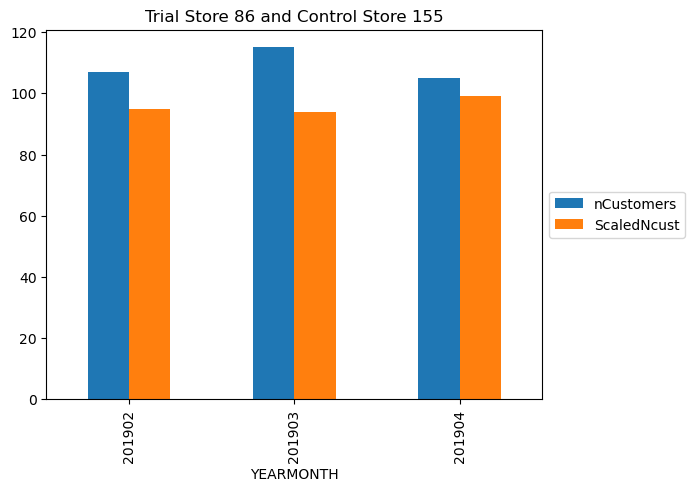

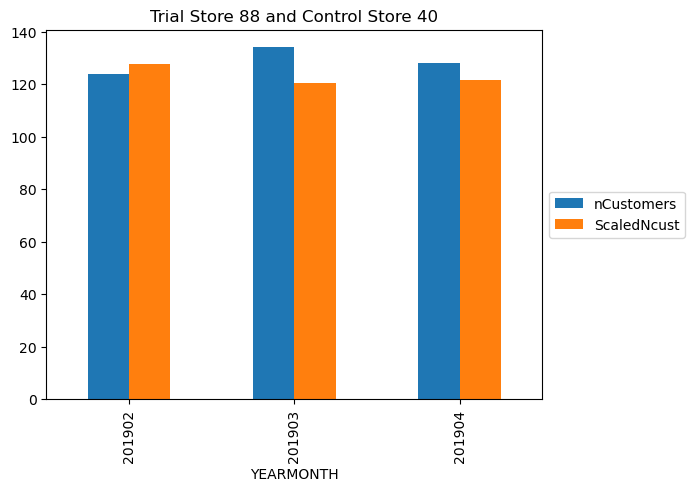

In [45]:
ncust_percentage_diff = {}

for trial, control in trial_control_dict.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control]
    b = full_trial_period[full_trial_period["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "nCustomers"]]
    ncust_percentage_diff[trial] = b["nCustomers"].sum() / a["ScaledNcust"].sum()
    b[["YEARMONTH", "nCustomers"]].merge(a[["YEARMONTH", "ScaledNcust"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_nCust", "TOT_SALES":"Trial_nCust"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [46]:
ncust_percentage_diff

{77: 1.2306529009742622, 86: 1.1354166666666667, 88: 1.0444876946258161}

In [47]:
# Creating a compiled ncust_percentage_difference table
temp1 = scaled_ncust_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index().drop(["nCustomers", "index"], axis=1)
temp2 = full_observ[full_observ["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "nCustomers"]].reset_index().drop(["index", "YEARMONTH"], axis=1)
scaledncust_vs_trial = pd.concat([temp1, temp2], axis=1)
scaledncust_vs_trial.columns = ["c_STORE_NBR", "YEARMONTH", "c_ScaledNcust", "t_STORE_NBR", "t_nCustomers"]
scaledncust_vs_trial["nCust_Percentage_Diff"] = (scaledncust_vs_trial["t_nCustomers"] - scaledncust_vs_trial["c_ScaledNcust"]) / (((scaledncust_vs_trial["t_nCustomers"] + scaledncust_vs_trial["c_ScaledNcust"])/2))

scaledncust_vs_trial["trial_period"] = scaledncust_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledncust_vs_trial[scaledncust_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEARMONTH,c_ScaledNcust,t_STORE_NBR,t_nCustomers,nCust_Percentage_Diff,trial_period
7,233,201902,45.151007,77,45,-0.003350,trial
8,233,201903,40.134228,77,50,0.218913,trial
9,233,201904,30.100671,77,47,0.438370,trial
19,155,201902,95.000000,86,107,0.118812,trial
20,155,201903,94.000000,86,115,0.200957,trial
21,155,201904,99.000000,86,105,0.058824,trial
31,40,201902,127.610209,88,124,-0.028697,trial
32,40,201903,120.464037,88,134,0.106388,trial
33,40,201904,121.484919,88,128,0.052228,trial


Check the significance of trial stores minus the control store's number of customers percentage difference pre-trial vs trial period

- Step 1: Check null hypothesis for 0 difference between control store's Pre-Trial and Trial period performance.
- Step 2: Proof control and trial stores are similar statistically
- Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

In [48]:
# Step 1
for num in [40, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == num]["ScaledNcust"],
                   trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == num]["ScaledNcust"],
                   equal_var=False), '\n')
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == num])])-1))

Store 40
Ttest_indResult(statistic=0.644732693420032, pvalue=0.5376573016017127) 

Store 155
Ttest_indResult(statistic=1.3888888888888882, pvalue=0.204345986327886) 

Store 233
Ttest_indResult(statistic=0.8442563765225701, pvalue=0.4559280037660254) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [50]:
# Step 2
for trial, cont in trial_control_dict.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pretrial[pretrial["STORE_NBR"] == trial]["nCustomers"],
                   pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == cont]["ScaledNcust"],
                   equal_var=True), '\n')

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pretrial[pretrial["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=-7.648483953264653e-15, pvalue=0.999999999999994) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


In [51]:
# Step 3
for trial, cont in trial_control_dict.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledncust_vs_trial[(scaledncust_vs_trial["c_STORE_NBR"] == cont) & (scaledncust_vs_trial["trial_period"]=="pre")]
    std = temp_pre["nCust_Percentage_Diff"].std()
    mean = temp_pre["nCust_Percentage_Diff"].mean()
    #print(std, mean)
    for t_month in scaledncust_vs_trial[scaledncust_vs_trial["trial_period"] == "trial"]["YEARMONTH"].unique():
        pdif = scaledncust_vs_trial[(scaledncust_vs_trial["YEARMONTH"] == t_month) & (scaledncust_vs_trial["t_STORE_NBR"] == trial)]["nCust_Percentage_Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.19886295797440687
201903 : 8.009609025380932
201904 : 16.114474772873923


Trial store: 86 , Control store: 155
201902 : 6.220524882227514
201903 : 10.52599074274189
201904 : 3.0763575852842706


Trial store: 88 , Control store: 40
201902 : -0.3592881735131531
201903 : 1.2575196020616801
201904 : 0.6092905590514273


Critical t-value for 95% confidence interval:
1.9431802803927816


/var/folders/xs/d1td623j4l5_3s9p262jr4yw0000gn/T/ipykernel_38328/3229306991.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(t_month,":",(float(pdif)-mean)/std)


There are 5 months of increase in performance that are statistically significant (Above the 95% confidence interval t-score):

- March and April trial months for trial store 77
- Feb, March and April trial months for trial store 86

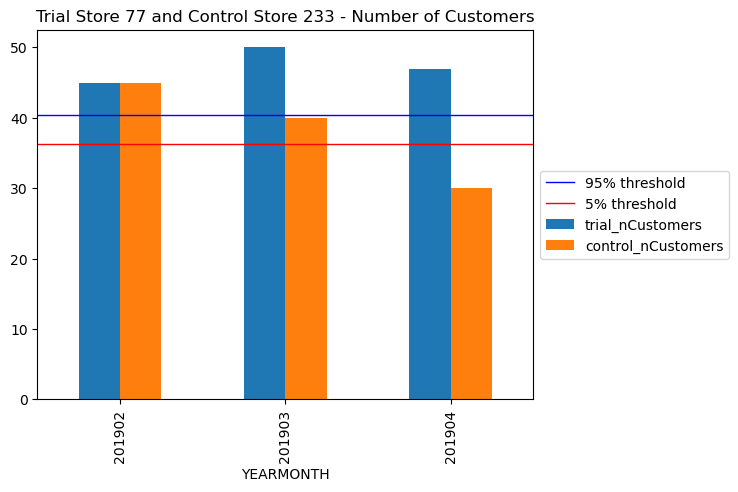

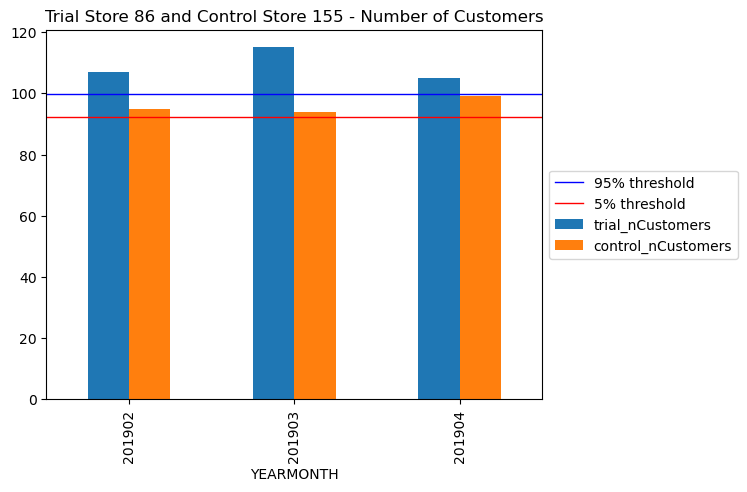

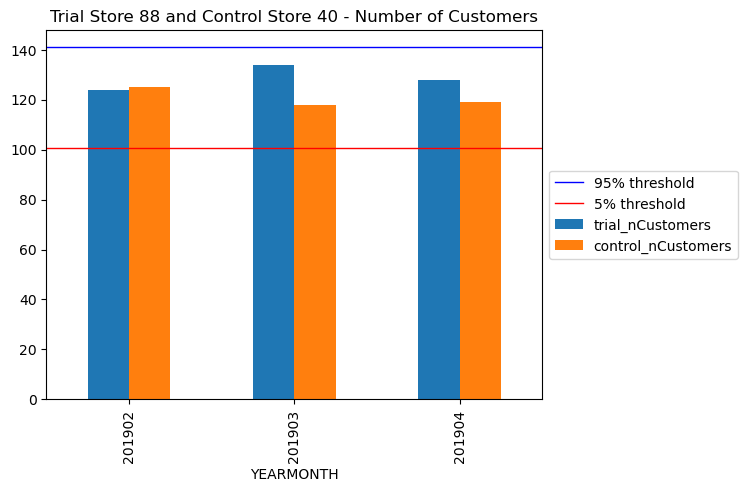

In [52]:
for trial, control in trial_control_dict.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control].rename(columns={"nCustomers": "control_nCustomers"})
    b = full_trial_period[full_trial_period["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "nCustomers"]].rename(columns={"nCustomers": "trial_nCustomers"})
    comb = b[["YEARMONTH", "trial_nCustomers"]].merge(a[["YEARMONTH", "control_nCustomers"]],on="YEARMONTH").set_index("YEARMONTH")
    comb.plot.bar()
    cont_sc_ncust = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control]["nCustomers"]
    std = scaledncust_vs_trial[(scaledncust_vs_trial["c_STORE_NBR"] == control) & (scaledncust_vs_trial["trial_period"]=="pre")]["nCust_Percentage_Diff"].std()
    thresh95 = cont_sc_ncust.mean() + (cont_sc_ncust.mean() * std * 2)
    thresh5 = cont_sc_ncust.mean() - (cont_sc_ncust.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Number of Customers")
    plt.savefig("TS {} and CS {} - nCustomers.png".format(trial,control), bbox_inches="tight")

We can see that Trial store 77 sales for Feb, March, and April exceeds 95% threshold of control store. Same goes to store 86 sales for all 3 trial months.

- Trial store 77: Control store 233
- Trial store 86: Control store 155
- Trial store 88: Control store 40
- Both trial store 77 and 86 showed significant increase in Total Sales and Number of Customers during trial period. But not for trial store 88. Perhaps the client knows if there's anything about trial store 88 that differs it from the other two trial stores.
- Overall the trial showed significant increase in sales as a result.